In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
def parse_output(outfile):
    """ Parses the quantum espresso output file """
    
    with open(outfile, 'r') as outf:
        for line in outf:
            if (line.lower().startswith('     lattice parameter (alat)')):
                lattice_constant = float(line.split()[-2]) * 0.529177
            if (line.lower().startswith('!    total energy')):
                total_energy = float(line.split()[-2]) * 13.605698066
            #if (line.lower().startswith('     atom    2 type  1   force')):
            #    test_string = line.split()
            #    x = test_string[-1]
            #    y = test_string[-2]
            #    z = test_string[-3]
            #    atom_force = force(x,y,z)
    
    #result = {'energy': total_energy, 'lattice': lattice_constant, 'force': atom_force}
    result = {'energy': total_energy, 'lattice': lattice_constant}
    return result 

In [4]:
def lattice_subs(file, lattice_constant):
    """ opens input file file and changes value for celldm(1) = lattice constant """
    
    # prepare new string
    new_string = "    celldm(1) = " + str(lattice_constant) + ",\n"
    
    # open the file 
    with open(file,'r') as input_file:
        lines = input_file.readlines()
    with open(file, 'w') as input_file:
        for line in lines:
            if line.split()[0] == 'celldm(1)':
                input_file.write(new_string)
            else:
                input_file.write(line) 

In [20]:
lattice_array = np.linspace(4.75, 6.42, 20)

In [21]:
def energy_vs_lattice(lattice_array):
    """ performs problem 7 part 1 calculations """
    
    # declare energy array of same size as cut off array 
    energy_array = np.zeros(len(lattice_array))
    
    for i in range(len(lattice_array)):
        # update input file 
        lattice_subs("fe.scf.in", lattice_array[i])
        
        # call pw.x 
        subprocess.run('pw.x -in fe.scf.in > fe.scf.out', shell=True)
        
        # parse output file 
        result = parse_output('fe.scf.out')
        
        # get force and append to array 
        energy_array[i] = result['energy']
        
    return energy_array

In [22]:
energy = energy_vs_lattice(lattice_array)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG
Note: The following floatin

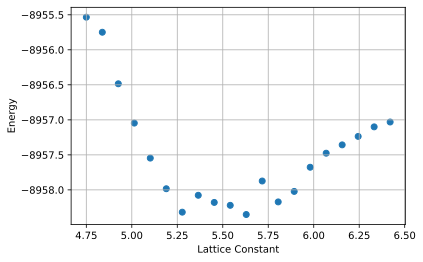

In [23]:
plt.scatter(lattice_array, energy)
plt.grid()
plt.xlabel('Lattice Constant')
plt.ylabel('Energy')
plt.show() 

In [15]:
def murnaghan(a, a0, B0, B0_prime, E0):
    coeff_1 = 9*B0*a0**3/16/4
    brac_1 = ((a0/a)**2 - 1)**3 * B0_prime 
    brac_2 = ((a0/a)**2 - 1)**2 * (6 - 4*(a0/a)**2)
    return E0 + coeff_1 * (brac_1 + brac_2)

In [16]:
from scipy.optimize import curve_fit

In [17]:
popt_m, pcov_m = curve_fit(murnaghan, lattice_array, energy, p0 = [5.50, 0.017855, 0.017855, -5.81340065e+03])

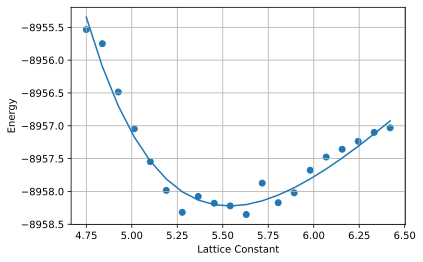

In [24]:
plt.scatter(lattice_array, energy)
plt.plot(lattice_array, murnaghan(lattice_array, *popt_m))
plt.grid()
plt.xlabel('Lattice Constant')
plt.ylabel('Energy')
plt.show() 

In [25]:
popt_m[0]

5.537335180346704